Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
def first_check(dataset):
    print(dataset.shape)
    print(dataset.info())
    print(dataset.head())
    print(dataset.tail())
    print(dataset.describe)
    print(dataset.duplicated().sum())

In [4]:
first_check(df)

(5000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
      Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
4995    0     28.0   35700.0            2                  0
4996    0     34.0   52400.0            1                  0
4997    0     20.0   33900.0            2                  0
4998    1     22.0   32700

153 дубликата. Так как вариативность данных низка по причине малого количества данных\признаков, то подобное количество дубликатов допустима. Оставим как есть

In [5]:
columns = ['Пол', 'Возраст',  'Зарплата',  'Члены семьи',  'Страховые выплаты']
print('Количество уникальных значений столбцов')
for i in columns:
    print('%s: ' %i, df[i].nunique())

Количество уникальных значений столбцов
Пол:  2
Возраст:  46
Зарплата:  524
Члены семьи:  7
Страховые выплаты:  6


## Комментарий ревьюера
<span style="color:green">Хорошо.</span>

In [6]:
def make_plot(title, x_name):
    sns.set()
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.countplot(x=x_name, data=df, palette='coolwarm')
    ax.set_title(title)
    plt.ylabel('Количество')

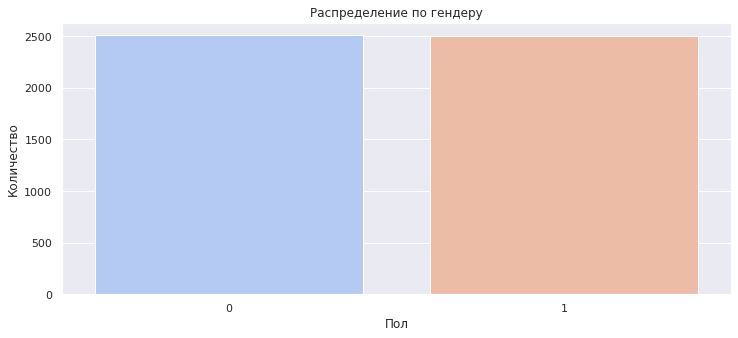

In [7]:
make_plot('Распределение по гендеру', 'Пол')

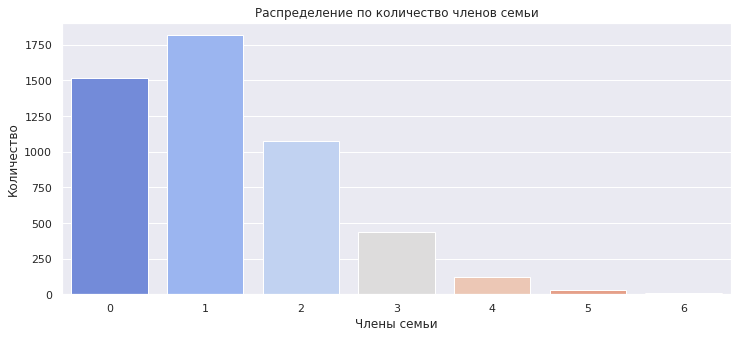

In [8]:
make_plot('Распределение по количество членов семьи', 'Члены семьи')

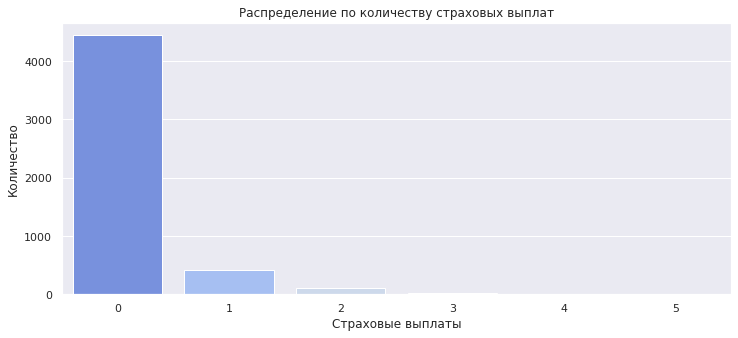

In [9]:
make_plot('Распределение по количеству страховых выплат', 'Страховые выплаты')

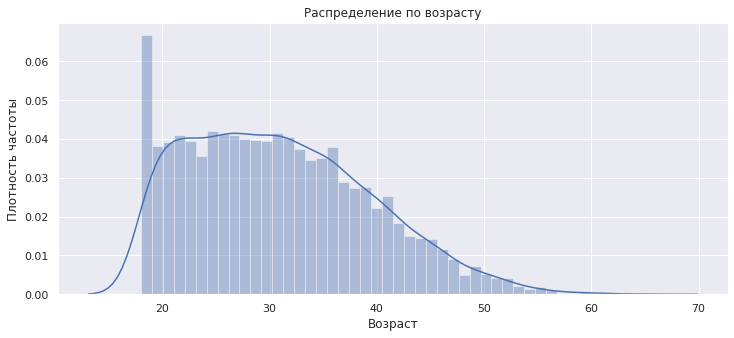

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))
ax.set_title('Распределение по возрасту')
plt.ylabel('Плотность частоты');

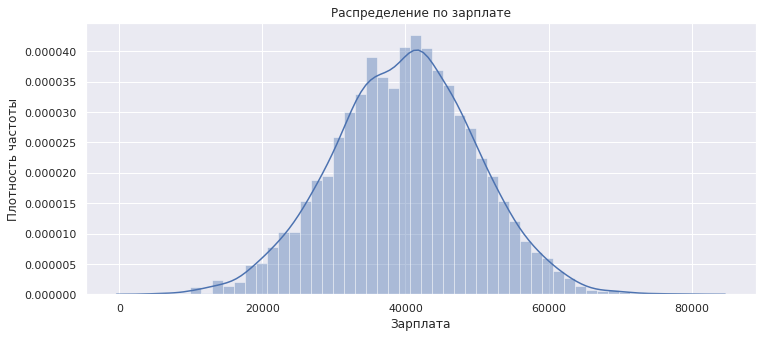

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Зарплата'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');

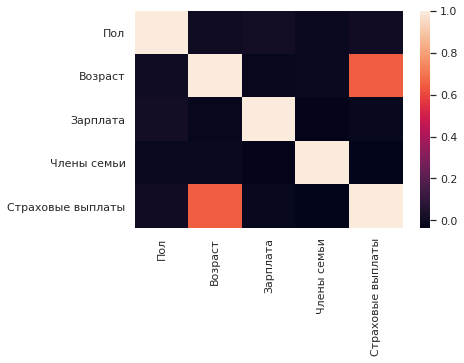

In [12]:
corr = df.corr()
sns.heatmap(corr)

In [13]:
df['Возраст'].corr(df['Страховые выплаты'])

0.6510300979467275

In [14]:
target = df.loc[:, 'Страховые выплаты']
features = df.drop(['Страховые выплаты'], axis=1)

Вывод:
- 5000 строк и 5 столбцов
- Целевой признак: Страховые выплаты
- Признаки: Пол, Возраст, Зарплата, Члены семьи
- Корреляция между Возрастом и Страховыми выплатами: 0.6510300979467276
- Данные пришли уже в обработанном состоянии

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:** 

Представим новую матрицу признаков X1 как произведение старой X на матрицу P(обратимую):
$$X1 = X∗P$$

Подставим новое значение X1 в формулу w1:
$$w1=((XP)^TXP)^{−1}(XP)^Ty$$

Раскроем первое произведение (XP)^T:
    $$w1=(P^TX^TXP)^{-1}P^TX^Ty$$

Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:
$$w1=(P^T(X^TX)P)^{-1}P^TX^Ty$$

Раскроем скобки $(P^T(X^TX)P)^{-1}$ :
$$w1=P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

Так как $P$ по условию обратимая, то произведение  $(P^T)^{−1}P^T$ равно $E$(единичная матрица):
$$w1=P^{-1}(X^TX)^{-1}EX^Ty=P^{-1}(X^TX)^{-1}X^Ty$$

Можно заметить, что справа получилась формула для $w$:
$$w1=P^{-1}(X^TX)^{-1}X^Ty=P^{-1}w$$

Подставим новое значение весов $𝑤1$ в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:
$$a=Xw$$

Подставим в эту формулу значения $X1$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:
$$a1=X1w1=XPP^{-1}w$$

Так как $P$ по условию обратимая, то произведение $PP^{−1}$ снова равно $E$:
$$a1=XPP^{-1}w=XEw=Xw=a$$

Мы доказали, что предсказания $a1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу - нет, не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:
$$w1=P^{-1}w$$

## 3. Алгоритм преобразования

**Алгоритм:** В качестве алгоритма преобразования можно предложить матрицу со случайными величинами, у которой существует обратная к ней матрица. Для этого, можно воспользоваться функцией numpy.random.randn.

**Обоснование**

Поделим признаки на test и train

In [15]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

Преобразуем выборки в матрицы

In [16]:
matrix_features_train = features_train.values
matrix_features_test = features_test.values

In [17]:
print(matrix_features_train.shape)
print(matrix_features_test.shape)

(4000, 4)
(1000, 4)


Сделаем рандомную обратимую матрицу 4 на 4 по количеству признаков основной матрицы:

In [18]:
random_matrix = np.random.randn(4, 4)
random_matrix

array([[ 0.9600713 ,  0.21204891,  1.40503408,  1.16005494],
       [-0.15839221,  1.02078213,  0.0751068 , -3.31736557],
       [-0.36048755,  0.8061713 ,  0.85465334,  0.49914443],
       [-0.33975256, -2.40244942, -0.90364925, -1.02722695]])

Проверим получившеюся матрицу на обратимость. Для этого умножим её на обратную ей матрицу. В результате должна получиться единичная матрица - та матрица, у которой по главной диаганали единицы, а остальное - нули.

In [19]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1.,  0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0., -0.,  0.,  1.]])

Полученная матрица является единичной, что значит рандомная матрица обратима.

Перемножим тестовую и тренировочную матрицы на получившуюся рандомную обратимую матрицу:

In [20]:
encoded_matrix_features_train = matrix_features_train.dot(random_matrix)
encoded_matrix_features_test = matrix_features_test.dot(random_matrix)

Для проверки попробуем перемножить признаки train на обратную рандомной матрицу:

In [21]:
decoded_matrix_features_train = encoded_matrix_features_train.dot(np.linalg.inv(random_matrix))

Воссоздадим DataFrame из матрицы:

In [22]:
features_train_check = pd.DataFrame(decoded_matrix_features_train, columns=features_train.columns)

In [23]:
features_train_check = np.round(features_train_check)

In [24]:
features_train_check, features_train

(      Пол  Возраст  Зарплата  Члены семьи
 0     0.0     20.0   39800.0          2.0
 1     1.0     40.0   34200.0         -0.0
 2     1.0     45.0   50800.0          1.0
 3     0.0     28.0   39100.0          2.0
 4     0.0     28.0   39000.0          1.0
 ...   ...      ...       ...          ...
 3995  0.0     42.0   32100.0         -0.0
 3996  0.0     28.0   22700.0          4.0
 3997  1.0     41.0   44700.0          1.0
 3998  0.0     22.0   50100.0          4.0
 3999  0.0     19.0   40800.0         -0.0
 
 [4000 rows x 4 columns],
       Пол  Возраст  Зарплата  Члены семьи
 317     0     20.0   39800.0            2
 4143    1     40.0   34200.0            0
 4252    1     45.0   50800.0            1
 710     0     28.0   39100.0            2
 148     0     28.0   39000.0            1
 ...   ...      ...       ...          ...
 3497    0     42.0   32100.0            0
 3492    0     28.0   22700.0            4
 2177    1     41.0   44700.0            1
 3557    0     22.0   5010

Данные не изменились

## 4. Проверка алгоритма

Создадим модель для матриц. Выбрали Линейную регрессию

In [25]:
model = LinearRegression()
model.fit(matrix_features_train, target_train)
predicted_norm = model.predict(features_test)
norm_r2 = model.score(features_test, target_test)

In [26]:
model.fit(encoded_matrix_features_train, target_train)
predicted_encoded = model.predict(encoded_matrix_features_test)
encoded_r2 = model.score(encoded_matrix_features_test, target_test)

In [27]:
print('R2 score of not encoded matrix: ', norm_r2)
print('R2 score of encoded matrix: ', encoded_r2)

R2 score of not encoded matrix:  0.4117683956770434
R2 score of encoded matrix:  0.4117683956770505


**Вывод**

Мы проверили качества моделей Линейной регрессии с помощью метрики R2 на данных - сначала на исходных, затем умноженных на обратимую матрицу, размер которой равен числу признаков. 
Показатели метрики совпали. Можно сделать вывод, что алгоритм работает.